In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
trues_informer = np.load("informerOutput/true.npy")
preds_informer = np.load("informerOutput/pred.npy")
mean_informer = np.load("informerOutput/mean.npy")
std_informer = np.load("informerOutput/std.npy")

preds_informer2 = np.load("informerOutput2/pred.npy")

trues_autoformer = np.load("autoformerOutput/true.npy")
preds_autoformer = np.load("autoformerOutput/pred.npy")
mean_autoformer = np.load("autoformerOutput/mean.npy")
std_autoformer = np.load("autoformerOutput/std.npy")


In [16]:
class StandardScaler():
    def __init__(self):
        self.mean = mean_informer[-1]
        self.std = mean_informer[-1]

    def inverse_transform(self, data):
        return (data * self.std) + self.mean
scaler = StandardScaler()

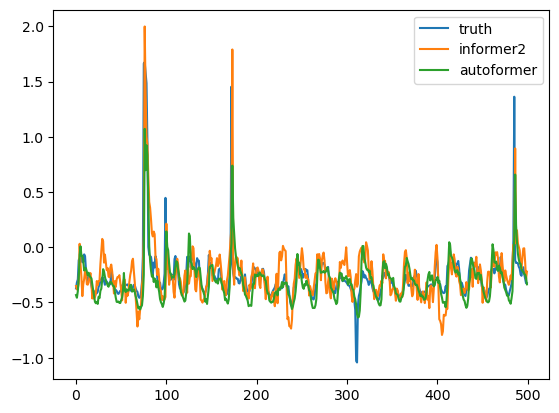

In [18]:
figure_length = 500
plt.figure()
plt.plot(trues_informer[0:figure_length,0,-1], label='truth')
plt.plot(preds_informer2[0:figure_length,0,-1], label='informer2')
plt.plot(preds_informer[0:figure_length,0,-1], label='autoformer')
plt.legend()
plt.show()

In [108]:
mulSeason = pd.read_csv("seasonOutput\pred.csv")
mulSeason = mulSeason[['MSTL']].to_numpy()
naive = pd.read_csv("naiveOutput\pred.csv")
naive = simple[['SeasonalNaive']].to_numpy()

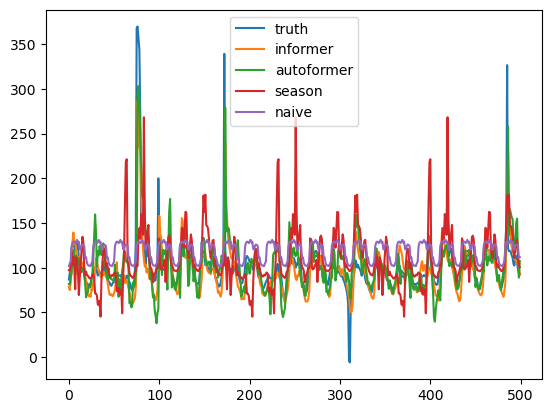

In [101]:
scaler = StandardScaler()
figure_length = 500
plt.figure()
plt.plot(scaler.inverse_transform(trues_informer[0:figure_length,0,-1]), label='truth')
plt.plot(scaler.inverse_transform(preds_informer[0:figure_length,0,-1]), label='informer')
plt.plot(scaler.inverse_transform(preds_autoformer[0:figure_length,0,-1]), label='autoformer')
plt.plot(mulSeason[0:figure_length], label='season')
plt.plot(naive[0:figure_length], label='naive')

plt.legend()
plt.show()

In [94]:
import numpy as np
def RSE(pred, true):
    return np.sqrt(np.sum((true - pred) ** 2)) / np.sqrt(np.sum((true - true.mean()) ** 2))
def CORR(pred, true):
    u = ((true - true.mean(0)) * (pred - pred.mean(0))).sum(0)
    d = np.sqrt(((true - true.mean(0)) ** 2 * (pred - pred.mean(0)) ** 2).sum(0))
    return (u / d).mean(-1)
def MAE(pred, true):
    return np.mean(np.abs(pred - true))
def MSE(pred, true):
    return np.mean((pred - true) ** 2)
def RMSE(pred, true):
    return np.sqrt(MSE(pred, true))
def MAPE(pred, true):
    return np.mean(np.abs((pred - true) / true))
def MSPE(pred, true):
    return np.mean(np.square((pred - true) / true))
def metric(pred, true):
    mae = MAE(pred, true)
    rmse = RMSE(pred, true)
    return mae, rmse

In [80]:
length = 8760

In [81]:
metric(scaler.inverse_transform(trues_informer[0:length,0,-1]), scaler.inverse_transform(preds_autoformer[0:length,0,-1]))

(22.60299, 45.37928)

In [82]:
metric(scaler.inverse_transform(trues_informer[0:length,0,-1]), scaler.inverse_transform(preds_informer2[0:length,0,-1]))

(24.128305, 47.616734)

In [110]:
metric(scaler.inverse_transform(trues_informer[0:length,0,-1]), mulSeason[0:length])

(46.267692409516954, 81.9282433720898)

In [111]:
metric(scaler.inverse_transform(trues_informer[0:length,0,-1]), naive[0:length])

(51.27998409972618, 80.45058808766187)